In [55]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [56]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import Nio
print (Nio.__version__)
import seaborn as seabornInstance 
import sklearn

print("python version:")
import platform
print(platform.python_version())

1.5.5
python version:
3.7.3


In [170]:
dat = xr.open_dataset('/global/scratch/medhap02/ERA5_MSLP_SST_Td_tas_Jan1979toApril2020.nc')
dat
data = dat.rename({'longitude':'lon', 'latitude':'lat'})


In [190]:
#data['msl'] = dat['msl'].drop('expver')
sst = data['sst']
#sst = sstdata/100
slp = data['msl']
#slp = slpdata.data/100
#slp['units'] = 'mb'
print(slp.units) # need to always convert from Pa to mb by dividing by 100
print(sst.units)

Pa
K


In [210]:
#sstdat = xr.open_dataset('http://apdrc.soest.hawaii.edu/dods/public_data/NOAA_SST/ERSST/monthly_v5')
sstdat = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc')
#sstdat
sst1= sstdat['sst']
sst1
print(sst1)
#note: lat & lon go by scale of 2 degrees

<xarray.DataArray 'sst' (time: 1996, lat: 89, lon: 180)>
[31975920 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-04-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]


In [202]:
slpdat = xr.open_dataset('slp.mnmean.real.nc')
print(slpdat)
slp1 = slpdat['slp']
slp1
#note: lat & lon go by scale of 5 degrees

<xarray.Dataset>
Dimensions:    (lat: 37, lon: 72, nbnds: 2, time: 2029)
Coordinates:
  * lat        (lat) float32 90.0 85.0 80.0 75.0 ... -75.0 -80.0 -85.0 -90.0
  * lon        (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * time       (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2019-01-01
Dimensions without coordinates: nbnds
Data variables:
    slp        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    title:        HadSLP2
    history:      Fri Mar  8 10:06:25 2013: ncks -d time,0,1957 slp.mnmean.re...
    comments:     adSLP2 was created using marine observations taken from ICO...
    Conventions:  CF-1.0
    platform:     Model
    source:       Hadley Center
    institution:  Hadley Center
    References:   https://www.esrl.noaa.gov/psd/data/gridded/data.hadslp2.html
    NCO:          20130308
    source_url:   https://hadobs.metoffice.com/hadslp2/


<xarray.DataArray 'slp' (time: 2029, lat: 37, lon: 72)>
[5405256 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 85.0 80.0 75.0 70.0 ... -75.0 -80.0 -85.0 -90.0
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2019-01-01
Attributes:
    long_name:             Monthly Mean Sea Level Pressure
    unpacked_valid_range:  [ 850. 1400.]
    actual_range:          [ 953.9066 1052.5088]
    units:                 mb
    precision:             1
    var_desc:              Sea Level Pressure
    dataset:               HadSLP2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Individual Observation
    valid_range:           [-32765  32765]

In [193]:
precipdat = xr.open_dataset('pALLIN.nc', decode_times=False)
print(precipdat)
time = pd.date_range('1874-05-01', freq='M', periods=1752)
precipALLIN = xr.Dataset({'data': ('data', precipdat['precip']), 'time': time, 'foo': ('int', np.arange(1752))})
precipALLIN

<xarray.Dataset>
Dimensions:  (time: 1752)
Coordinates:
  * time     (time) float32 0.0 1.0 2.0 3.0 4.0 ... 1748.0 1749.0 1750.0 1751.0
Data variables:
    precip   (time) float32 ...
Attributes:
    title:        
    description:  All-India Rainfall
    scripturl01:  https://climexp.knmi.nl/getindices.cgi?STATION=All-India_Ra...
    comment:      
    institution:  KNMI Climate Explorer
    scripturl02:  https://climexp.knmi.nl/dat2nc.cgi?id=$id&station=All-India...
    history:       2020-04-02  2:43:20 bin/dat2nc data/pALLIN.dat p All-India...
    Conventions:  CF-1.0


<xarray.Dataset>
Dimensions:  (data: 1752, int: 1752, time: 1752)
Coordinates:
  * data     (data) float32 19.6 10.7 14.5 33.9 63.6 ... 168.7 52.1 8.0 7.0
  * time     (time) datetime64[ns] 1874-05-31 1874-06-30 ... 2020-04-30
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1745 1746 1747 1748 1749 1750 1751

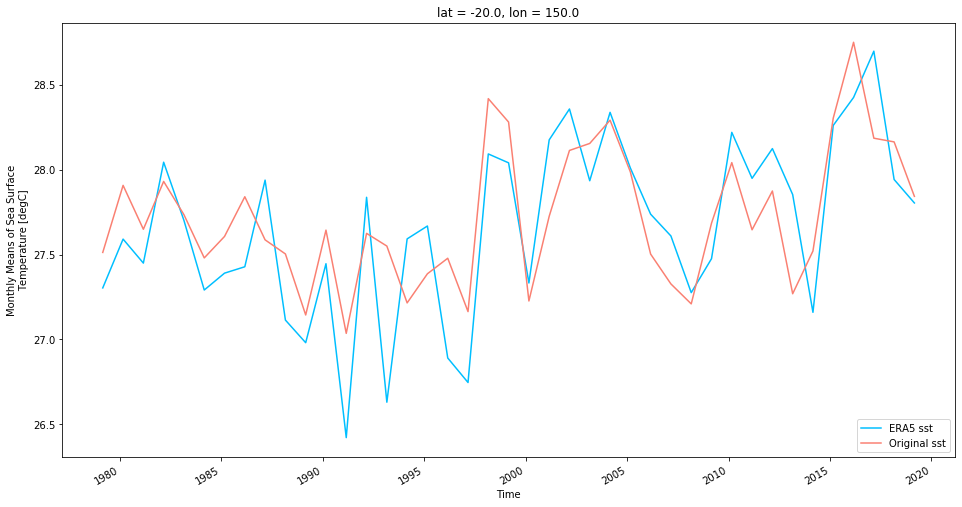

In [212]:
series1 = sst1.sel(lat = slice(-20, -20), lon = slice(150, 150), time = (sst1['time.month']==3)).sel(time = slice('1979-03-01', '2019-03-01'))
seriestemp = sst.sel(lat = slice(-20, -20), lon = slice(150, 150), time = (sst['time.month']==3), expver = slice(0,1)).sel(time = slice('1979-03-01', '2019-03-01'))
series = seriestemp-273.15

plt.figure(figsize=(16,8))
plt.title('Comparing SST Datsets', fontsize = 'xx-large')
series.plot(label='ERA5 sst', color = 'deepskyblue')
series1.plot(label='Original sst', color = 'salmon')
plt.legend(loc='lower right')

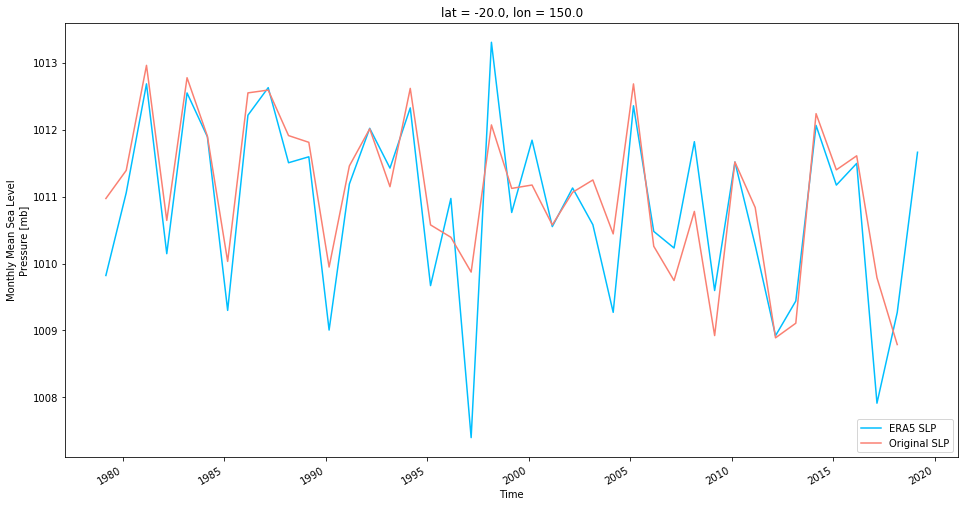

In [196]:
series1 = slp1.sel(lat = slice(-20, -20), lon = slice(150, 150), time = (slp1['time.month']==3)).sel(time = slice('1979-03-01', '2019-03-01'))
seriestemp = slp.sel(lat = slice(-20, -20), lon = slice(150, 150), time = (slp['time.month']==3), expver = slice(0,1)).sel(time = slice('1979-03-01', '2019-03-01'))
series = seriestemp/100

#del seriestemp['expver']
#series = series1temp.squeeze('expver')
#series = xr.DataArray.drop_vars(series1temp, 'expver')

plt.figure(figsize=(16,8))
plt.title('Comparing SLP Datsets', fontsize = 'xx-large')
series.plot(label='ERA5 SLP', color = 'deepskyblue')
series1.plot(label='Original SLP', color = 'salmon')
plt.legend(loc='lower right')

In [ ]:
# Copyright (c) 2020 Medha Palavalli.